In [77]:
# ML_B
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

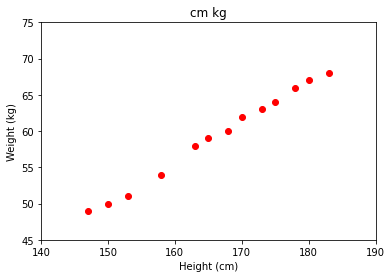

In [118]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('cm kg')
plt.show()

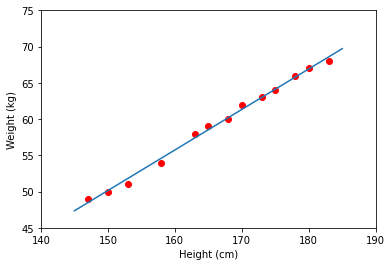

In [9]:
one = np.ones((X.shape[0], 1)) # w0*x0 => x0=1
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [19]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


-33.735410205790714

In [21]:
# use sklearn
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


weight =  1
bias =  9
learning_rate =  0.0001
iter =  1000


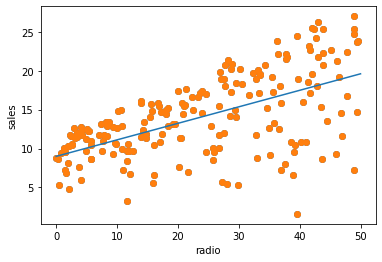

weight =  1
bias =  0
learning_rate =  0.001
iter =  1000


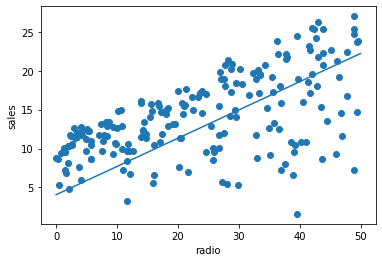

In [113]:
#Gradient descent

df = pd.read_csv('Advertising.csv', header=0)
#radio
X = df.values[:, 2]
#sale
y = df.values[:, 4]

plt.scatter(X, y, marker="o")

def predict(new_radio, weight, bias):
    return weight*new_radio + bias

def cost_func(X, y, weight, bias):
    n = len(X)
    sum = 0
    for i in range(n):
        sum += (y[i] - (weight*X[i] + bias))**2
        
    return sum

def update(X, y, weight, bias, learning_rate):
    n = len(X)
    weight_tmp = 0.0
    bias_tmp = 0.0 
    for i in range(n):
        weight_tmp += -2*X[i]*(y[i] - (weight*X[i] + bias))
        bias_tmp += -2*(y[i] - (weight*X[i] + bias))
    weight -= (weight_tmp/n)*learning_rate
#     print(bias_tmp/n*learning_rate)
    bias -= (bias_tmp/n)*learning_rate
    
    return weight, bias

def train(X, y, weight, bias, learning_rate, iter):
    cost_his = []
    for i in range(iter): 
        weight, bias = update(X, y ,weight, bias, learning_rate)
        cost = cost_func(X, y ,weight, bias)
        cost_his.append(cost)
        
    return weight, bias, cost_his

# Case 1: 
def test_gradient_descent(X, y, weight, bias, learning_rate, iter):
    print('weight = ', weight)
    print('bias = ', bias)
    print('learning_rate = ', learning_rate)
    print('iter = ', iter)
    plt.scatter(X, y, marker="o")
    weight, bias, cost = train(X, y, weight, bias, learning_rate, iter)

    x0 = np.linspace(0, 50, 2)
    y0 = bias + weight*x0

    plt.plot(x0, y0)               # the fitting line
    plt.xlabel('radio')
    plt.ylabel('sales')

    plt.show()
    
test_gradient_descent(X, y, 1, 9, 0.0001, 1000)
test_gradient_descent(X, y, 1, 0, 0.001, 1000)


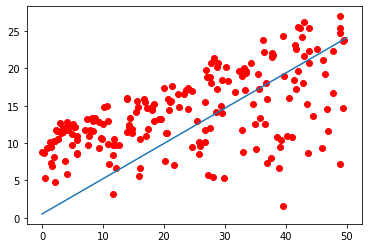

In [110]:
# Case 2: 
# plt.scatter(X, y, marker="o")
plt.plot(X, y, 'ro')
weight, bias, cost = train(X, y, 1, 0, 0.0001, 1000)

x0 = np.linspace(0, 50, 2)
y0 = bias + weight*x0

plt.plot(x0, y0)               # the fitting line

plt.show()

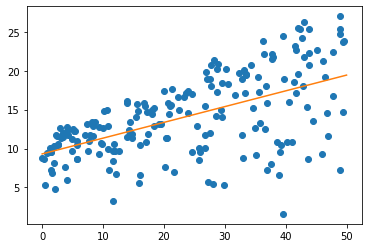

9.311638095158344
0.2024957833924379


In [68]:
X_new = np.array([X]).T
y_new = np.array([y]).T
one = np.ones((X_new.shape[0], 1)) # w0*x0 => x0=1
Xbar = np.concatenate((one, X_new), axis = 1)
# print(Xbar)
# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y_new)
w = np.dot(np.linalg.pinv(A), b)
# print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 50, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'o')     # data 
plt.plot(x0, y0)               # the fitting line
# plt.axis([140, 190, 45, 75])
plt.show()
print(w_0)
print(w_1)